# 2차원 영역에서의 FDM(Finite Difference Method)

정사각형 계산 영역 $\Omega = (0,1)\times (0,1)$에 대해 경계값이 0인 포아송 방정식(Poisson's equation)을 유한차분법(FDM)을 이용하여 계산하려고 한다.

$$\left\{\begin{array}{rl}
-\Delta u &= f \quad \text{in} \ \Omega \\
u & = 0 \quad \text{on}\ \partial \Omega
\end{array}\right.$$

아래 순서에 따라 해를 계산하시오.
<br>
<br>

(주의) Problem 1~3의 계산에 필요한 코드는 수업 시간에 사용했던 코드만 이용 가능하며, 아래에 자유롭게 칸을 추가하고 코드를 복사하여 사용하시오.

In [1]:
# 수업 시간에 사용했던 코드 및 과제에서 사용한 코드 중 필요한 코드를 복사하여 사용하세요.
import copy

def matrix_zeros(m,n):
    return [[0 for _ in range(n)] for _ in range(m)]

def matrix_ones(m,s):
    return [[1 for _ in range(s)] for _ in range(m)]

def matrix_identity(n):
    return [[1 if i==j else 0 for i in range(n)] for j in range(n)]

def is_matrix(A):
    m=len(A)
    if m==0:
        return (0,0)
    n=len(A[0])
    for i in range(1,m):
        if len(A[i])!=n:
            return (0,0)
    return (m,n)

def vector_subtraction(u,v):
    s=[u[i]-v[i] for i in range(len(u))]
    return s

def vector_inner_product(u,v):
    sum=0
    for i in range(len(u)):
        sum+=u[i]*v[i]
    return sum

def matrix_subtraction(A,B):
    isA=is_matrix(A)
    C=matrix_zeros(isA[0],isA[1])
    for i in range(isA[0]):
        for j in range(isA[1]):
            C[i][j]=A[i][j]-B[i][j]
    return C

def matrix_vector_mult(A,x):
    u=[0 for j in range(len(A))]
    for i in range(len(A)):
        u[i]=vector_inner_product(x,A[i])
    return u

def matrix_mult(A,B):
    isA = is_matrix(A)
    isB = is_matrix(B)
    C=matrix_zeros(isA[0],isB[1])
    for i in range(isA[0]):
        for j in range(isB[1]):
            for k in range(isA[1]):
                C[i][j]+=A[i][k]*B[k][j]
    return C

def inverse_Gauss_Jordan(ss):
    mA, nA = is_matrix(ss)
    A = copy.deepcopy(ss)
    Ain = matrix_identity(mA)
    for i in range(mA-1):
        for j in range(i+1,mA):
            sub = A[j][i]/A[i][i]
            if sub==0:
                continue
            for k in range(mA):
                Ain[j][k] -= sub*Ain[i][k]
            for k in range(i,mA):
                A[j][k] -= sub*A[i][k]
    for i in range(mA-1,-1,-1):
        for j in range(i):
            sub = A[j][i]/A[i][i]
            for k in range(mA):
                Ain[j][k]-=sub*Ain[i][k]
                A[j][k] -= sub*A[i][k]
        sub = A[i][i]
        A[i][i]=1.0
        for j in range(mA):
            Ain[i][j]/=sub
    return Ain

**<span style="font-size: 20px; color: blue"> (Problem 1) 대각 행렬 </span>**

벡터 $\boldsymbol{a} \in \mathbb{R}^n$를 입력 받아 대각 행렬을 만드는 함수를 정의하시오.

예) a = [1,2,3,4]

A = [[1,0,0,0], [0,2,0,0], [0,0,3,0], [0,0,0,4]]


$$\boldsymbol{a} = \left[\begin{array}{c} 1 \\  2 \\ 3 \\ 4 \end{array}\right] \qquad \Rightarrow \qquad A = \left[\begin{array}{c c c c} 1 & 0 & 0 & 0 \\ 0 & 2 & 0 & 0 \\ 0 & 0 & 3 & 0 \\ 0 & 0 & 0 & 4\end{array}\right]$$

In [2]:
def diagonal_matrix(a):
    A = matrix_identity(len(a))
    for i in range(len(a)):
        A[i][i]=a[i]
    return A

In [3]:
a = [1,2,3,4]
A = diagonal_matrix(a)
print(A)

[[1, 0, 0, 0], [0, 2, 0, 0], [0, 0, 3, 0], [0, 0, 0, 4]]


**<span style="font-size: 20px; color: blue"> (Problem 2) 3중 대각 행렬 </span>**

벡터 $\boldsymbol{a} \in \mathbb{R}^{n-1}, \ \boldsymbol{d} \in \mathbb{R}^{n}, \ \boldsymbol{c} \in \mathbb{R}^{n-1}$를 입력 받아 3중 대각 행렬을 만드는 함수를 정의하시오.

예) a = [1,1,1,1], d = [3,3,3,3,3], c = [2,2,2,2]

A = [[3,2,0,0,0], [1,3,2,0,0], [0,1,3,2,0], [0,0,1,3,2], [0,0,0,1,3]


$$\boldsymbol{a} = \left[\begin{array}{c} 1 \\  1 \\ 1 \\ 1 \end{array}\right],\ \boldsymbol{d} = \left[\begin{array}{c} 3 \\  3 \\ 3 \\ 3 \\ 3 \end{array}\right],\ \boldsymbol{c} = \left[\begin{array}{c} 2 \\  2 \\ 2 \\ 2 \end{array}\right] \qquad \Rightarrow \qquad A = \left[\begin{array}{c c c c c} 3 & 2 & 0 & 0 & 0 \\ 1 & 3 & 2 & 0 & 0 \\ 0 & 1 & 3 & 2 & 0\\ 0 & 0 & 1 & 3 & 2 \\ 0 & 0 & 0 & 1 & 3\end{array}\right]$$

In [4]:
def tridiagonal_matrix(a,d,c):
    A = diagonal_matrix(d)
    for i in range(len(a)):
        A[i+1][i] = a[i]
        A[i][i+1] = c[i]
    return A

In [5]:
a = [1,1,1,1]
d = [3,3,3,3,3]
c = [2,2,2,2]
B = tridiagonal_matrix(a,d,c)
print(B)

[[3, 2, 0, 0, 0], [1, 3, 2, 0, 0], [0, 1, 3, 2, 0], [0, 0, 1, 3, 2], [0, 0, 0, 1, 3]]


**<span style="font-size: 20px; color: blue"> (Problem 3) 블록 3중 대각 행렬 </span>**



**<span style="font-size: 20px; color: blue"> (Problem 2) 3중 대각 행렬 </span>**

3차원 행렬 $\boldsymbol{A} \in \mathbb{R}^{(n-1) \times n \times n},\ \boldsymbol{D} \in \mathbb{R}^{n \times n \times n}, \ \boldsymbol{C} \in \mathbb{R}^{(n-1)\times n \times n}$과 행렬 $B\in \mathbb{R}^{n\times n}$를 입력 받아 다음과 같은 블록 시스템의 해 $X\in \mathbb{R}^{n\times n}$를 구하는 Block_Tri()를 정의하시오.
<br>

$$ \left[\begin{array}{c c c c c c c} D_0 & C_0 &  &  &  \\ A_0 & D_1 & C_1 &  &  \\ & \ddots & \ddots & \ddots &  \\  &  & A_{i-1} & D_i & C_i \\  &  &  & \ddots & \ddots & \ddots &  \\  &  &  &  & A_{n-3} & D_{n-2} & C_{n-2} \\  &  &  &  &  & A_{n-2} & D_{n-1} \end{array}\right] = \left[\begin{array}{c} X_0 \\  X_1 \\ \vdots \\ X_i \\ \vdots \\ X_{n-2} \\ X_{n-1} \end{array}\right] = \boldsymbol{d} = \left[\begin{array}{c} X_0 \\  B_1 \\ \vdots \\ B_i \\ \vdots \\ B_{n-2} \\ B_{n-1} \end{array}\right]$$
<br>

$$(A_i,\ D_i,\ C_i \in \mathbb{R}^{n\times n},\quad X_i,\ B_i \in \mathbb{R}^n)$$

In [6]:
def Block_Tri(A,D,C,B):
    for i in range(1,len(D)):
        T = matrix_mult(A[i-1],inverse_Gauss_Jordan(D[i-1]))
        D[i]=matrix_subtraction(D[i],matrix_mult(T,C[i-1]))
        B[i]=vector_subtraction(B[i],matrix_vector_mult(T,B[i-1]))
    X=[matrix_zeros(len(D),len(D)) for i in range(len(D))]
    X[-1]=matrix_vector_mult(inverse_Gauss_Jordan(D[-1]),B[-1])
    for i in range(len(X)-2,-1,-1):
        X[i] = matrix_vector_mult(inverse_Gauss_Jordan(D[i]),vector_subtraction(B[i],matrix_vector_mult(C[i],X[i+1])))
    return X

In [7]:
N = 10

# 벡터 정의
a = [-1 for j in range(N-2)]
b = [1/N**2 for j in range(N-1)]
c = [-1 for j in range(N-2)]
d = [4 for j in range(N-1)]
e = [-1 for j in range(N-1)]
f = [-1 for j in range(N-1)]

# 블록 행렬 정의
D = tridiagonal_matrix(a,d,c)
D = [D for i in range(N-1)]

A = diagonal_matrix(e)
A = [A for i in range(N-2)]

C = diagonal_matrix(f)
C = [C for i in range(N-2)]

B = [b for i in range(N-1)]

In [8]:
# 시스템 해결
X = Block_Tri(A,D,C,B)

In [9]:
# 경계값 포함한 해
U = matrix_zeros(N+1,N+1)
for j in range(1,N):
    U[j] = [0] + X[j-1] + [0]
    
# 계산 영역의 x좌표와 y좌표    
XX = [[i/N for i in range(N+1)] for j in range(N+1)]
YY = [[j/N for i in range(N+1)] for j in range(N+1)]

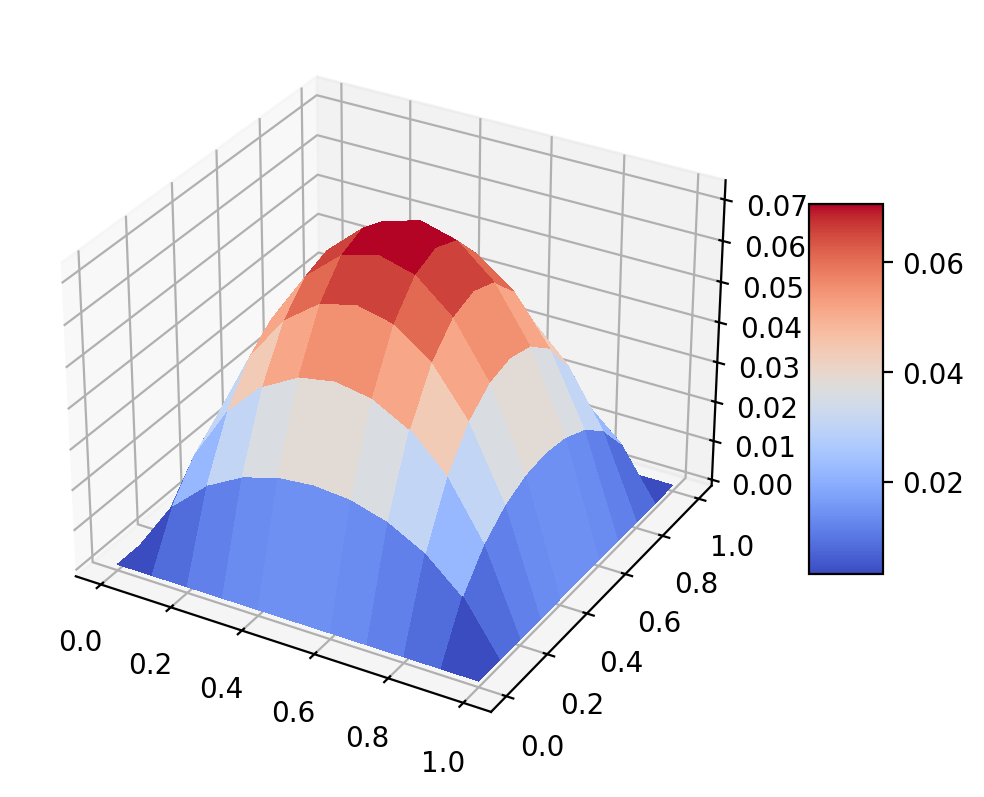

In [10]:
# 시스템 해에 대한 3차원 그래프
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

%matplotlib inline
%config InlineBackend.figure_format='retina'

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(np.array(XX), np.array(YY), np.array(U), cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

In [11]:
print(X[4]) #N = 10일 때

[0.02882829166894591, 0.0493143154094415, 0.06288441551337455, 0.07059843553416115, 0.07309843553416114, 0.07059843553416116, 0.06288441551337455, 0.04931431540944151, 0.02882829166894591]


결과
```
[0.028828291668945908, 0.049314315409441506, 0.06288441551337454, 0.07059843553416115, 0.07309843553416115, 0.07059843553416116, 0.06288441551337454, 0.0493143154094415, 0.028828291668945908]
```